In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from sklearn.metrics import confusion_matrix
import seaborn as sns
from keras.preprocessing import image
from tensorflow.keras.models import load_model
import librosa
import glob
import os.path
from librosa import display

In [ ]:
t=[]
sampling_rate=[]
path = '/content/drive/MyDrive/Colab Notebooks/donateacry_corpus_cleaned_and_updated_data/tired'
for filename in glob.glob(os.path.join(path, '*.wav')):
    y, sr = librosa.load(filename) 
    #y = y / tf.int16.max
    sampling_rate.append(sr)
    t.append(y)
    y_freq_domain = librosa.stft(y,n_fft=512, hop_length=256)
    y_fft_abs = np.abs(y_freq_domain)
    # display a spectrogtam
    fig, ax = plt.subplots()
    img = librosa.display.specshow(librosa.amplitude_to_db(y_fft_abs,ref=np.max),y_axis='log', x_axis='time', ax=ax)
    file = str(filename) + '.png'
    plt.savefig(str(file))

In [3]:
path_dir = '/content/drive/MyDrive/Colab Notebooks/donateacry_corpus_cleaned_and_updated_data/'
datagen = ImageDataGenerator(
                    rescale=1./255,
                    validation_split = 0.2)
train_generator = datagen.flow_from_directory(
    path_dir,
    target_size=(150,150),
    shuffle=True,
    subset='training'
)
validation_generator = datagen.flow_from_directory(
    path_dir,
    target_size=(150,150),
    subset='validation'
)

Found 368 images belonging to 5 classes.
Found 89 images belonging to 5 classes.


In [4]:
model = tf.keras.models.Sequential([
    #first_convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
     tf.keras.layers.Dropout(0.4),
    #second_convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
     tf.keras.layers.Dropout(0.4),
    #third_convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
     tf.keras.layers.Dropout(0.4),
    #fourth_convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax') 
]) 

In [5]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(train_generator, batch_size=32,epochs=100, validation_data=validation_generator)

Epoch 1/100
12/12 [==============================] - 29s 2s/step - loss: 0.8357 - accuracy: 0.8016 - val_loss: 1.2546 - val_accuracy: 0.8539
Epoch 2/100
12/12 [==============================] - 18s 1s/step - loss: 0.7183 - accuracy: 0.8315 - val_loss: 1.3271 - val_accuracy: 0.8539
Epoch 3/100
12/12 [==============================] - 16s 1s/step - loss: 0.7060 - accuracy: 0.8315 - val_loss: 1.2552 - val_accuracy: 0.8539
Epoch 4/100
12/12 [==============================] - 16s 1s/step - loss: 0.7051 - accuracy: 0.8315 - val_loss: 1.2490 - val_accuracy: 0.8539
Epoch 5/100
12/12 [==============================] - 16s 1s/step - loss: 0.6873 - accuracy: 0.8315 - val_loss: 1.2627 - val_accuracy: 0.8539
Epoch 6/100
12/12 [==============================] - 18s 2s/step - loss: 0.7269 - accuracy: 0.8315 - val_loss: 1.3614 - val_accuracy: 0.8539
Epoch 7/100
12/12 [==============================] - 16s 1s/step - loss: 0.7136 - accuracy: 0.8315 - val_loss: 1.2576 - val_accuracy: 0.8539
Epoch 8/100
1

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 74, 74, 16)       0         
 g2D)                                                            
                                                                 
 dropout_11 (Dropout)        (None, 74, 74, 16)        0         
                                                                 
 conv2d_17 (Conv2D)          (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 36, 36, 32)       0         
 g2D)                                                            
                                                                 
 dropout_12 (Dropout)        (None, 36, 36, 32)       

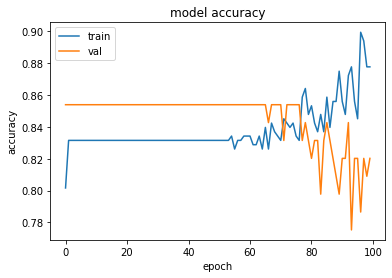

In [6]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

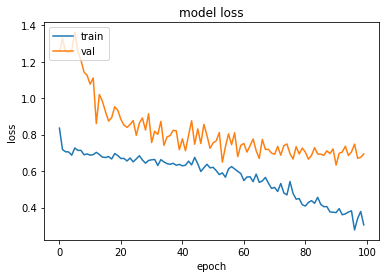

In [7]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
accuracy = model.evaluate(validation_generator)
print('n', 'Test_Accuracy:-', accuracy[1])
pred = model.predict(validation_generator)

3/3 [==============================] - 1s 240ms/step - loss: 1.0515 - accuracy: 0.8539
n Test_Accuracy:- 0.8539325594902039


In [ ]:
import math

number_of_examples = len(validation_generator.filenames)
number_of_generator_calls = math.ceil(number_of_examples / (1.0 * 32)) 
# 1.0 above is to skip integer division

test_labels = []

for i in range(0,int(number_of_generator_calls)):
    test_labels.extend(np.array(validation_generator[i][1]))

confusion matrix
[[ 0  0  0  3  0]
 [ 0  0  0  1  0]
 [ 0  0  0  5  0]
 [ 0  0  0 76  0]
 [ 0  0  0  4  0]]


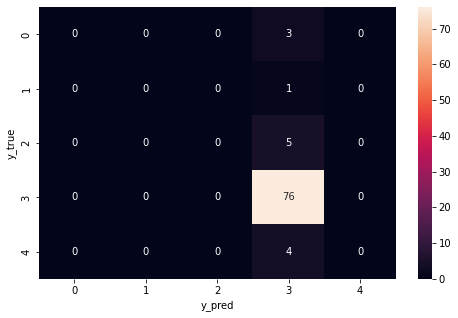

In [ ]:
y_pred = np.argmax(pred, axis=1)
y_true = np.argmax(test_labels, axis=1)
print('confusion matrix')
print(confusion_matrix(y_true, y_pred))
    #confusion matrix
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_true, y_pred), annot=True, fmt=".0f", ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()